<a href="https://colab.research.google.com/github/richamudi/Bharat-Intern_Task-01-SMS-Classifier/blob/main/bharat_intern_task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK NO. 01
# SMS classifier
# Develop a text classification model to classify SMS as either spam or non-spam
# using data science techniques in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
sms_data = pd.read_csv('/content/drive/MyDrive/Interships/bharat intern tasks/sms_spam.csv')

In [4]:
print("First few rows of the dataset:")
print(sms_data.head())

First few rows of the dataset:
   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4  spam  okmail: Dear Dave this is your final notice to...


In [6]:
print("Missing values in the dataset:")
print(sms_data.isnull().sum())

Missing values in the dataset:
type    0
text    0
dtype: int64


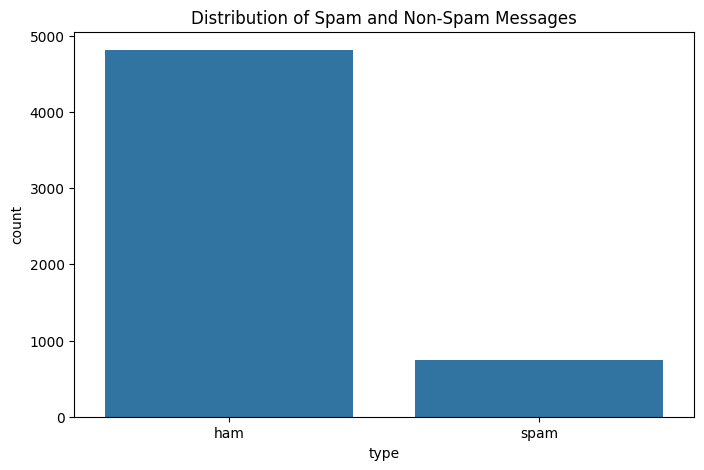

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=sms_data)
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()

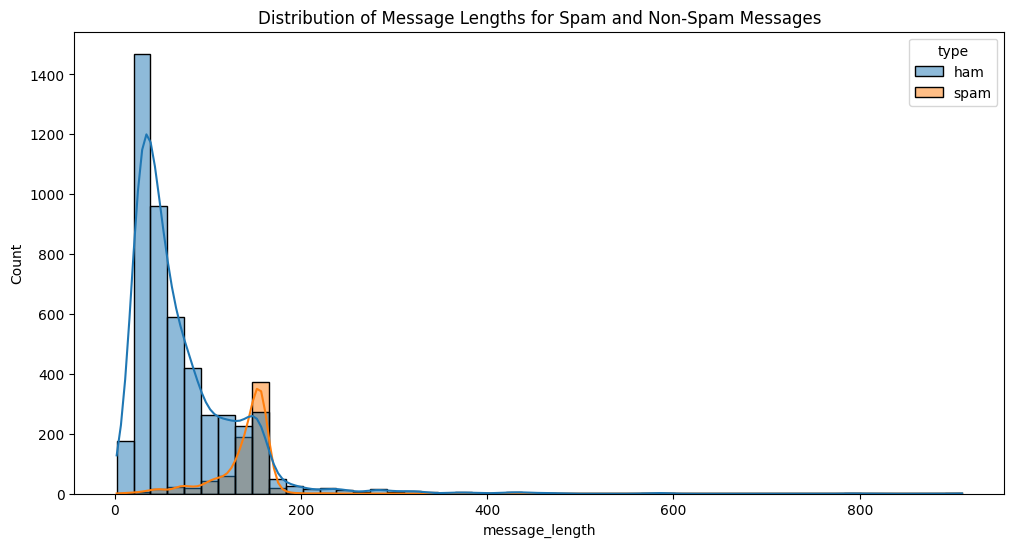

In [7]:
sms_data['message_length'] = sms_data['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=sms_data, x='message_length', hue='type', bins=50, kde=True)
plt.title('Distribution of Message Lengths for Spam and Non-Spam Messages')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sms_data['text'], sms_data['type'], test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [10]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [11]:
y_pred = classifier.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9820143884892086
